# Airline Passenger Satisfaction: SQL-Based ETL and Data Analysis

## Introduction

Understanding passenger satisfaction is critical for the airline industry to enhance customer experience, improve operational efficiency, and maintain competitive advantage. This project focuses on analyzing passenger satisfaction data using an SQL-based ETL process to uncover key factors influencing satisfaction and make data-driven recommendations.

## Objectives

1. Develop an ETL pipeline using SQLite and Python to process airline satisfaction data.
2. Clean and transform the dataset to ensure data quality and usability.
3. Perform SQL-based analysis to identify patterns and factors influencing passenger satisfaction.
4. Provide actionable insights to airlines for improving passenger satisfaction.

### Dataset Details

Source: Kaggle's "Airline Passenger Satisfaction" dataset.
Size: Includes 25 columns and a substantial number of rows capturing passenger feedback.
Features: Passenger demographics, flight details, service ratings (e.g., seat comfort, food, and in-flight entertainment), and satisfaction levels (categorical: "Satisfied" or "Neutral or Dissatisfied").

## Approach

1. Extract: The dataset was loaded into SQLite using Python in Jupyter Notebook for structured query processing.
2. Transform: 
Handled missing values, standardized column names, and created derived features (e.g., delay_impact).
Removed duplicate records to ensure data integrity.
3. Load: The cleaned dataset was stored in SQLite for analysis.
4. Analysis: Advanced SQL queries were employed to explore satisfaction patterns, service ratings, delay impacts, and demographic trends. Visualizations in Python complemented the findings for better interpretation.

In [1]:
# Importing necessary libraries

import sqlite3
import pandas as pd

In [2]:
#Connecting to SQLite database

connection = sqlite3.connect("airline_passenger_satisfaction.db")
cursor = connection.cursor()

Extracting Data

In [3]:
#Loading dataset

data = pd.read_csv("airline_passenger_satisfaction.csv")

data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
#Loading data to SQLite table

data.to_sql("satisfaction_data", connection, if_exists = "replace", index = False)

129880

In [7]:
#Verifying 

query = "SELECT * FROM satisfaction_data LIMIT 5;"

df_preview = pd.read_sql_query(query, connection)
df_preview

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Cleaning and Standardizing Data

In [8]:
#Checking for missing data

query = """
SELECT
COUNT(*) AS Total_Rows,
SUM(CASE WHEN [Arrival Delay] IS NULL THEN 1 ELSE 0 END) AS missing_arrival_delay,
SUM(CASE WHEN [Departure Delay] IS NULL THEN 1 ELSE 0 END) AS missing_departure_delay
FROM satisfaction_data;
"""

pd.read_sql_query(query, connection)

,Total_Rows,missing_arrival_delay,missing_departure_delay
0,129880,393,0


In [9]:
#Deleting rows with missing values

query = """
DELETE FROM satisfaction_data
WHERE [Arrival Delay] IS NULL;
"""

cursor.execute(query)
connection.commit()

In [10]:
query = """
SELECT
COUNT(*) AS rows_with_nulls
FROM satisfaction_data
WHERE [Arrival Delay] IS NULL;
"""
pd.read_sql_query(query, connection)

,rows_with_nulls
0,0


In [11]:
#Standardizing column names

data.columns = [col.lower().replace(" ","_") for col in data.columns]
data.to_sql("satisfaction_data", connection, if_exists = "replace", index = False)

129880

In [15]:
#Adding derived columns

query = """
UPDATE satisfaction_data
SET delay_impact_ = arrival_delay + departure_delay;
"""

cursor.execute(query)
connection.commit()

In [17]:
#Removing duplicate rows

query = """
DELETE FROM satisfaction_data
WHERE id NOT IN (SELECT MIN(id) FROM satisfaction_data GROUP BY id);
"""

cursor.execute(query)
connection.commit()

In [18]:
#Checking the cleaned data

query = "SELECT * FROM satisfaction_data LIMIT 10;"

pd.read_sql_query(query, connection)

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,...,seat_comfort,leg_room_service,cleanliness,food_and_drink,in-flight_service,in-flight_wifi_service,in-flight_entertainment,baggage_handling,satisfaction,delay_impact_
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,7
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,65
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,0
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,0
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,1
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,3,3,4,4,4,4,Satisfied,0
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,4,5,5,3,5,5,Satisfied,0
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,4,4,4,4,3,4,3,3,Satisfied,3
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,3,4,3,3,4,4,4,4,Neutral or Dissatisfied,0
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,4,5,4,2,5,2,5,5,Satisfied,13


Loading

In [20]:
#Creating a table for cleaned data

query = """
CREATE TABLE IF NOT EXISTS cleaned_data AS
SELECT * FROM satisfaction_data;
"""

cursor.execute(query)
connection.commit()

Data Analysis on Cleaned Data

In [21]:
# 1. Satisfaction by travel class

query = """
SELECT class, satisfaction, COUNT(*) AS COUNT
FROM cleaned_data
GROUP BY class, satisfaction
ORDER BY class DESC;
"""

pd.read_sql_query(query, connection)

,class,satisfaction,COUNT
0,Economy Plus,Neutral or Dissatisfied,7092
1,Economy Plus,Satisfied,2319
2,Economy,Neutral or Dissatisfied,47366
3,Economy,Satisfied,10943
4,Business,Neutral or Dissatisfied,18994
5,Business,Satisfied,43166


Passenger satisfaction is strongly correlated with travel class

Passengers in higher-class cabins (Economy Plus and Business) tend to have higher satisfaction levels compared to those in Economy class.
The airline might need to focus on improving the travel experience for Economy class passengers to enhance overall satisfaction.

In [22]:
# 2. Distribution of Satisfaction Levels

query = """
SELECT satisfaction, 
COUNT(*) AS Count
FROM cleaned_data
GROUP BY satisfaction;
"""

pd.read_sql_query(query, connection)

,satisfaction,Count
0,Neutral or Dissatisfied,73452
1,Satisfied,56428


In [23]:
# 3. Average flight distance by satisfaction level

query = """
SELECT satisfaction,
AVG(flight_distance) AS avg_flight_distance
FROM cleaned_data
GROUP BY satisfaction;
"""

pd.read_sql_query(query, connection)

,satisfaction,avg_flight_distance
0,Neutral or Dissatisfied,929.715420
1,Satisfied,1529.539165


The airline has a significant number of passengers who are either neutral or dissatisfied with their travel experience.
This suggests a need for improvement in various aspects of the service to enhance passenger satisfaction.

In [24]:
# 4. Impact of delays on satisfaction

query = """
SELECT delay_impact, satisfaction,
COUNT(*) AS count
FROM cleaned_data
GROUP BY delay_impact, satisfaction
ORDER BY delay_impact;
"""

pd.read_sql_query(query, connection)

,delay_impact,satisfaction,count
0,0,Neutral or Dissatisfied,31433
1,0,Satisfied,28065
2,1,Neutral or Dissatisfied,2117
3,1,Satisfied,1861
4,2,Neutral or Dissatisfied,1717
...,...,...,...
1339,1948,Neutral or Dissatisfied,1
1340,2028,Satisfied,1
1341,2243,Neutral or Dissatisfied,1
1342,2585,Satisfied,1


There is a clear trend of decreasing satisfaction as the delay_impact increases. This confirms the negative impact of flight delays on passenger experience.

In [25]:
# 5. Correlation between Age Groups and Satisfaction 

query = """
SELECT
CASE 
WHEN age < 18 THEN 'Child'
WHEN age BETWEEN 18 AND 36 THEN 'Young Adult'
WHEN age BETWEEN 36 AND 60 THEN 'Adult'
ELSE 'Senior'
END AS age_group, satisfaction, 
COUNT(*) AS count
FROM cleaned_data
GROUP BY age_group, satisfaction
ORDER BY age_group;
"""

pd.read_sql_query(query, connection)

,age_group,satisfaction,count
0,Adult,Neutral or Dissatisfied,28774
1,Adult,Satisfied,36440
2,Child,Neutral or Dissatisfied,8200
3,Child,Satisfied,1647
4,Senior,Neutral or Dissatisfied,7961
5,Senior,Satisfied,2093
6,Young Adult,Neutral or Dissatisfied,28517
7,Young Adult,Satisfied,16248


Age seems to play a role in passenger satisfaction.
Adults may be more satisfied with the airline's services compared to other age groups.
The airline might need to focus on improving the travel experience for children and seniors to enhance their satisfaction.

In [26]:
# 6. Average ratings of Service attributes for each class

query = """
SELECT 
class,
AVG(departure_and_arrival_time_convenience) AS avg_time_convenience,
AVG(online_boarding) AS avg_online_boarding,
AVG(seat_comfort) AS avg_seat_comfort,
AVG([in-flight_service]) AS avg_inflight_service,
AVG([in-flight_entertainment]) AS avg_inflight_entertainment,
AVG(baggage_handling) AS avg_baggage_handling
FROM cleaned_data
GROUP BY class;
"""

pd.read_sql_query(query, connection)

,class,avg_time_convenience,avg_online_boarding,avg_seat_comfort,avg_inflight_service,avg_inflight_entertainment,avg_baggage_handling
0,Business,2.907915,3.719032,3.763707,3.846268,3.639350,3.844852
1,Economy,3.192577,2.814677,3.141813,3.466497,3.096572,3.450617
2,Economy Plus,3.209967,2.885559,3.168207,3.382850,3.120497,3.351504


In [27]:
# 7. Satisfaction based on Travel purpose

query = """
SELECT type_of_travel, satisfaction,
COUNT(*) AS count
FROM cleaned_data
GROUP BY type_of_travel, satisfaction
ORDER BY type_of_travel;
"""

pd.read_sql_query(query, connection)

,type_of_travel,satisfaction,count
0,Business,Neutral or Dissatisfied,37337
1,Business,Satisfied,52356
2,Personal,Neutral or Dissatisfied,36115
3,Personal,Satisfied,4072


A higher number of "Neutral or Dissatisfied" passengers compared to "Satisfied" passengers. This indicates that passengers traveling for personal reasons are less likely to be satisfied with their flight experience.

In [28]:
# 8. Delay analysis for dissatisfied passengers

query = """
SELECT
AVG(departure_delay) AS avg_departure_delay,
AVG(arrival_delay) AS avg_arrival_delay,
AVG(delay_impact) AS avg_total_delay
FROM cleaned_data
WHERE satisfaction = 'Neutral or Dissatisfied';
"""

pd.read_sql_query(query, connection)

,avg_departure_delay,avg_arrival_delay,avg_total_delay
0,16.406837,17.055992,33.410118


Dissatisfied passengers experience significantly longer delays on average compared to the overall population.
Delays are a major contributing factor to passenger dissatisfaction.

Data Visualization

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

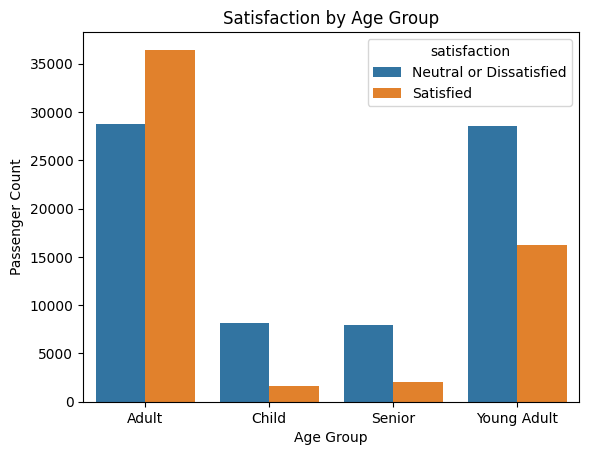

In [30]:
# 1. Age group vs. Satisfaction

query = """
SELECT 
CASE 
WHEN age < 18 THEN 'Child'
WHEN age BETWEEN 18 AND 36 THEN 'Young Adult'
WHEN age BETWEEN 36 AND 60 THEN 'Adult'
ELSE 'Senior'
END AS age_group, satisfaction,
COUNT(*) AS count
FROM cleaned_data
GROUP BY age_group, satisfaction
ORDER BY age_group
"""

df_age_satisfaction = pd.read_sql_query(query, connection)

# Plot

sns.barplot(data = df_age_satisfaction, x = 'age_group', y = 'count', hue = 'satisfaction')
plt.title("Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Passenger Count")
plt.show()

Adults appear to be the most satisfied passenger group overall.

Children and Seniors seem to have a lower level of satisfaction compared to Adults and Young Adults.

This suggests that the airline might need to focus on improving the travel experience for children and seniors to enhance their overall satisfaction.

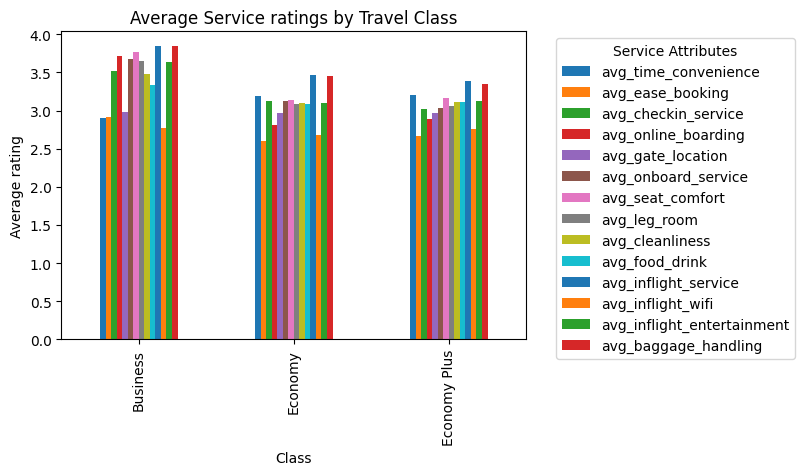

In [31]:
# 2. Service rating by Travel Class

query = """
SELECT class,
AVG(departure_and_arrival_time_convenience) AS avg_time_convenience,
AVG(ease_of_online_booking) AS avg_ease_booking,
AVG([check-in_service]) AS avg_checkin_service,
AVG(online_boarding) AS avg_online_boarding,
AVG(gate_location) AS avg_gate_location,
AVG([on-board_service]) AS avg_onboard_service,
AVG(seat_comfort) AS avg_seat_comfort,
AVG(leg_room_service) AS avg_leg_room,
AVG(cleanliness) AS avg_cleanliness,
AVG(food_and_drink) AS avg_food_drink,
AVG([in-flight_service]) AS avg_inflight_service,
AVG([in-flight_wifi_service]) AS avg_inflight_wifi,
AVG([in-flight_entertainment]) AS avg_inflight_entertainment,
AVG(baggage_handling) AS avg_baggage_handling
FROM cleaned_data
GROUP BY class;
"""

df_service_ratings = pd.read_sql_query(query, connection)

# Plot
df_service_ratings.set_index("class").plot(kind = "bar", figsize = (6,4))
plt.title("Average Service ratings by Travel Class")
plt.xlabel("Class")
plt.ylabel("Average rating")
plt.legend(title = "Service Attributes", loc = "upper left", bbox_to_anchor = (1.05,1))
plt.show()

The airline's service quality appears to be differentiated across travel classes, with Business Class passengers experiencing a higher level of service.

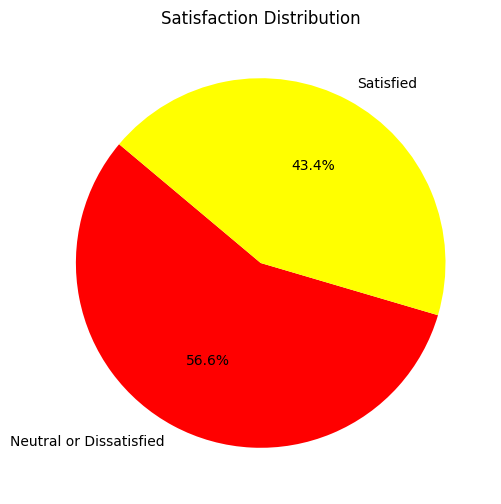

In [32]:
# 3. Satisfaction Distribution

query = """
SELECT satisfaction,
COUNT(*) AS count
FROM cleaned_data
GROUP BY satisfaction;
"""

df_satisfaction = pd.read_sql_query(query, connection)

# Plot

plt.figure(figsize = (6,6))
plt.pie(df_satisfaction['count'], labels = df_satisfaction['satisfaction'], autopct = '%1.1f%%', startangle = 140, colors = ['red','yellow'])
plt.title("Satisfaction Distribution")
plt.show()

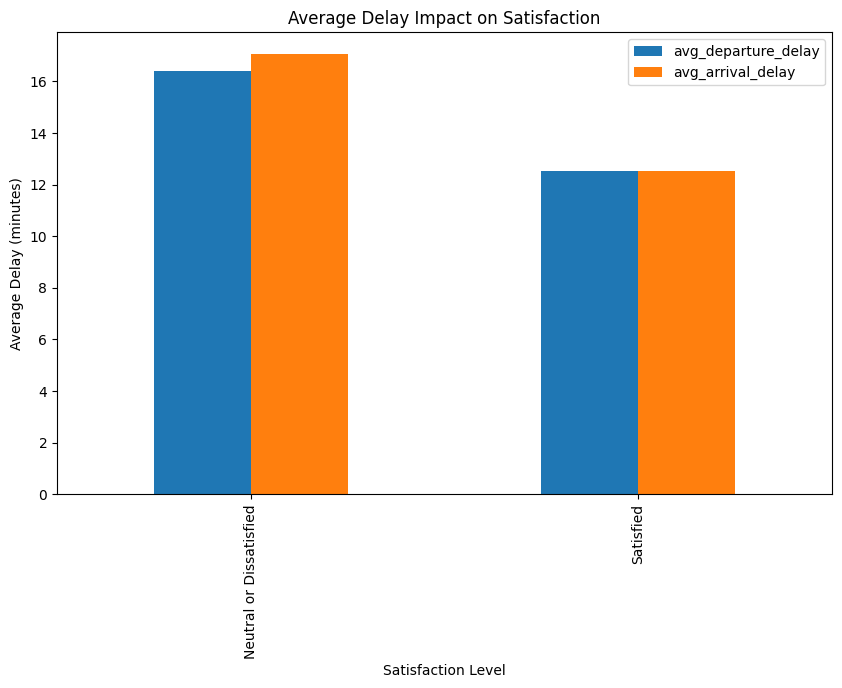

In [33]:
# 4. Avgerage Delay Impact on Satisfaction

query = """
SELECT 
satisfaction,
AVG(departure_delay) AS avg_departure_delay,
AVG(arrival_delay) AS avg_arrival_delay
FROM cleaned_data
GROUP BY satisfaction;
"""
df_delays = pd.read_sql_query(query, connection)

# Plot

df_delays.set_index('satisfaction').plot(kind='bar', figsize=(10, 6))
plt.title("Average Delay Impact on Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Delay (minutes)")
plt.show()

Flight delays, particularly longer ones, have a strong negative impact on passenger satisfaction.
Both departure and arrival delays contribute to passenger dissatisfaction, with arrival delays potentially having a slightly greater impact.

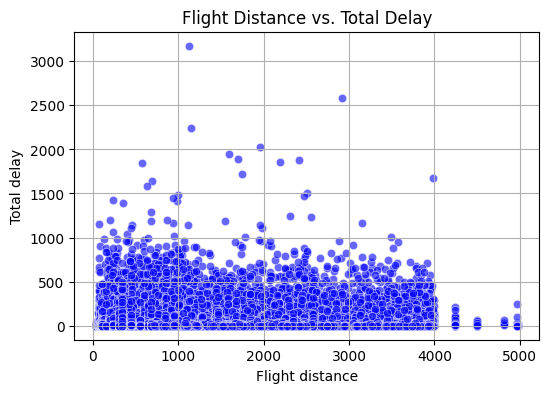

In [34]:
# 5. Flight Distance vs. Total Delay

query = """
SELECT flight_distance, delay_impact
FROM cleaned_data;
"""

df_scatter = pd.read_sql_query(query, connection)

# Plot

plt.figure(figsize = (6,4))
sns.scatterplot(data = df_scatter, x = "flight_distance", y = "delay_impact", alpha = 0.6, color = "blue")
plt.title("Flight Distance vs. Total Delay")
plt.xlabel("Flight distance")
plt.ylabel("Total delay")
plt.grid(True)
plt.show()

The presence of outliers suggests that exceptional circumstances can lead to significant delays, even for shorter flights.

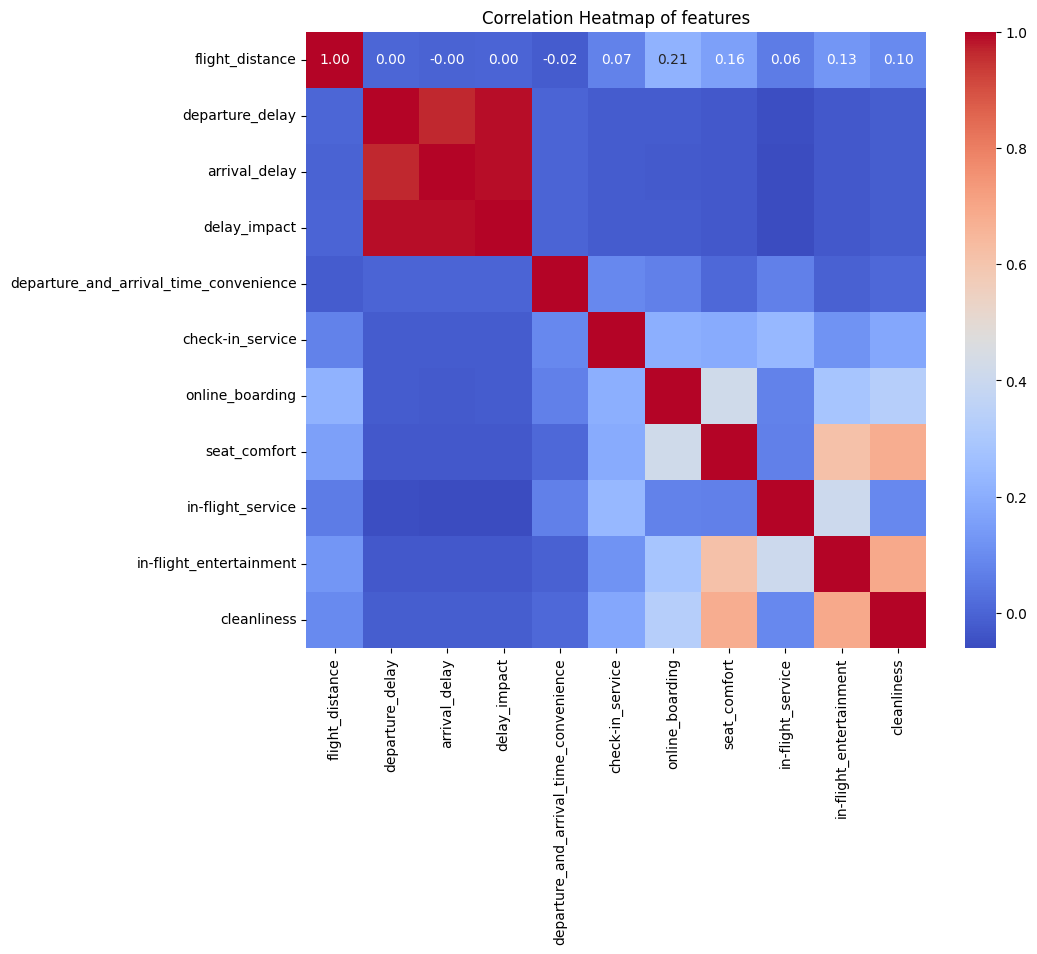

In [35]:
# 6. Correlation between features

query = """
SELECT 
flight_distance,
departure_delay,
arrival_delay,
delay_impact,
departure_and_arrival_time_convenience,
[check-in_service],
online_boarding,
seat_comfort,
[in-flight_service],
[in-flight_entertainment],
cleanliness
FROM cleaned_data;
"""

df_correlation = pd.read_sql_query(query, connection)

correlation = df_correlation.corr()

# Plot
plt.figure(figsize = (10,8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = ".2f", cbar = True)
plt.title("Correlation Heatmap of features")
plt.show()

1. The heatmap confirms the strong relationship between departure and arrival delays.
2. Delay Impact is heavily influenced by the duration of departure and arrival delays.
3. Flight distance might have a slight influence on delays, but the relationship is not very strong.
4. Service-related attributes appear to be largely independent of flight delays.

## Conclusion and Recommendations

This project demonstrated the effective use of SQL-based ETL processes and data analysis techniques to extract actionable insights. Key recommendations include:

1. Enhance Key Services: Focus on improving in-flight entertainment, cleanliness, and seat comfort to boost satisfaction.
2. Reduce Delays: Prioritize efficient flight operations to minimize delays and their impact on passenger satisfaction.
3. Segmented Offerings: Tailor services for business and leisure travelers to meet their distinct expectations.